# La biblioteca geopandas

[GeoPandas](http://geopandas.org/) es un proyecto de software libre que extiende los tipos de datos de [Pandas](http://pandas.pydata.org/) para incorporar objetos geométricos (puntos, líneas, polígonos, etc). GeoPandas se apoya en las bibliotecas [Shapely](https://pypi.org/project/Shapely/) para realizar las operaciones geométricas, [Fiona](https://github.com/Toblerity/Fiona) para acceder a los datos (ej. en archivos) y [Descartes](https://bitbucket.org/sgillies/descartes/src/default/) y [Matplotlib](https://matplotlib.org/) para graficación.

El objetivo de GeoPandas es facilitar el trabajo con datos geoespaciales en el lenguaje Python, lo que se logra a través de la implementación de nuevas estructuras. Las dos estructuras principales de GeoPandas son:

- [GeoSeries](http://geopandas.org/data_structures.html#geoseries): es un vector en el que cada elemento es un conjunto de una o varias geometrías correspondientes a una observación. Por ejemplo, el polígono (o multipolígono) que representa una provincia.
- [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe): es una estructura tabular (i.e. con filas y columnas) de datos geométricos y no geométricos (ej. textos, números). El conjunto de geometrías se implementa a través de GeoSeries.

## Instalación

### En una estación de trabajo

geopandas puede instalarse tanto mediante [Conda](https://conda.io/) como mediante [pip](https://pypi.org/project/pip/).

```shell
# Instalación mediante Conda
conda install geopandas

# Instalación mediante pip
pip install geopandas
```

### En Google Colab

```shell
# Instalación de bibliotecas de GDAL para Python
!apt install gdal-bin python-gdal python3-gdal

# Instalación de r-tree
!apt install python3-rtree

# Instalación de GeoPandas
!pip install git+git://github.com/geopandas/geopandas.git

# Instalación de Descartes
!pip install descartes
```

## Carga

In [1]:
# Carga de bibliotecas
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Versión de geopandas
gpd.__version__

'0.9.0'

## Estructuras de datos
Las dos principales estructuras de datos de geopandas son geoseries y geodataframes.

## Operaciones básicas

### read_file() - carga de datos

In [3]:
# Lectura de datos de países
paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

paises

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### info() - información general sobre un conjunto de datos

In [4]:
paises.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


### head(), tail(), sample() - despliegue de filas de un conjunto de datos

In [5]:
# Muestra de 10 filas
paises.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


### Selección de columnas

In [6]:
paises[["name", "pop_est"]]

,name,pop_est
0,Fiji,920938
1,Tanzania,53950935
2,W. Sahara,603253
3,Canada,35623680
4,United States of America,326625791
...,...,...
172,Serbia,7111024
173,Montenegro,642550
174,Kosovo,1895250
175,Trinidad and Tobago,1218208


### Selección de filas

In [7]:
# Países con población estimada mayor o igual a mil millones
paises[paises["pop_est"] >= 1000000000]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


### Selección de filas y columnas en la misma expresión

In [8]:
paises.loc[paises["pop_est"] >= 1000000000, ["name", "pop_est"]]

,name,pop_est
98,India,1281935911
139,China,1379302771


### plot() - mapeo

<AxesSubplot:>

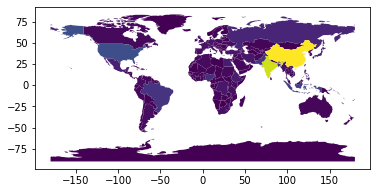

In [9]:
# Mapa de coropletas
paises.plot(column = "pop_est")

## Operaciones de análisis

<AxesSubplot:>

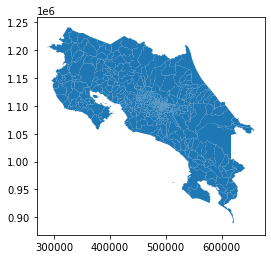

In [10]:
# Carga de datos de distritos de Costa Rica

# Desde un shapefile local descomprimido
# distritos = gpd.read_file("datos/division-territorial/LIMITE_POLITICO_ADMINISTRATIVO_region.shp")

# Desde un shapefile local comprimido
distritos = gpd.read_file("zip://./datos/division-territorial/limite_politico_administrativo_region.zip")

distritos.plot()